## Importing the libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso


## Importing the dataset

In [3]:
car_dataset = pd.read_csv('car data.csv')
car_dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
corelation = car_dataset.corr()

C:\Users\Faizan computer\AppData\Local\Temp\ipykernel_4296\3040591433.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corelation = car_dataset.corr()


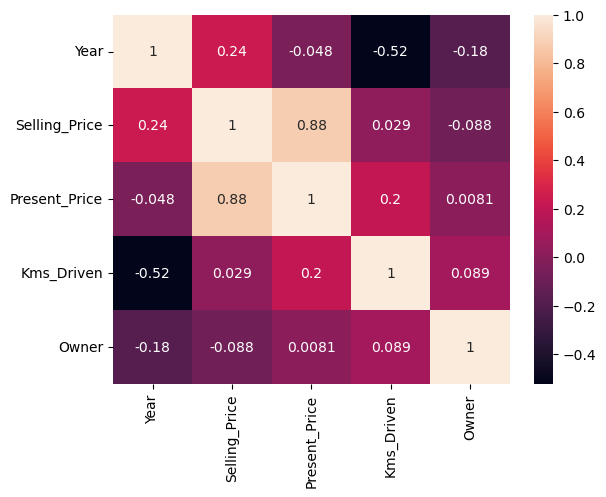

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corelation,annot=True, xticklabels = corelation.columns , yticklabels = corelation.columns  )
plt.show()

## checking the number of rows and columns

In [3]:
car_dataset.shape

(301, 9)

## getting some information about the dataset

In [4]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


## checking the number of missing values

In [5]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

## checking the distribution of categorical data

In [6]:
car_dataset.Fuel_Type.value_counts()


Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [7]:
car_dataset.Seller_Type.value_counts()


Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [8]:
car_dataset.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

## Encoding the Categorical Data

### encoding "Fuel_Type" Column

In [9]:
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

### encoding "Seller_Type" Column

In [10]:
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

### encoding "Transmission" Column

In [11]:
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

### Importing the Encoding Data

In [12]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


## Splitting the predictor and Target

In [14]:
X = car_dataset.drop(['Car_Name','Selling_Price'],axis = 1)
y = car_dataset['Selling_Price']

In [15]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


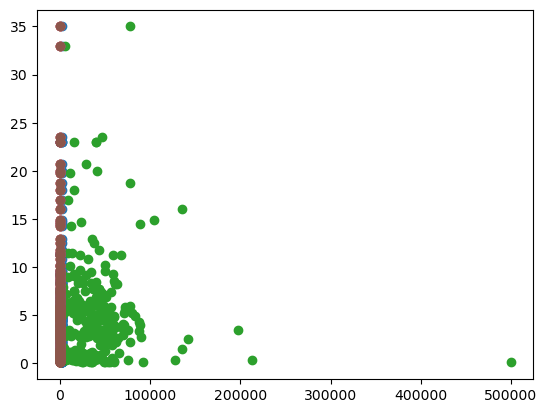

In [55]:
plt.scatter(car_dataset['Year'],car_dataset['Selling_Price'])
plt.scatter(car_dataset['Present_Price'],car_dataset['Selling_Price'])
plt.scatter(car_dataset['Kms_Driven'],car_dataset['Selling_Price'])
plt.scatter(car_dataset['Fuel_Type'],car_dataset['Selling_Price'])
plt.scatter(car_dataset['Transmission'],car_dataset['Selling_Price'])
plt.scatter(car_dataset['Owner'],car_dataset['Selling_Price'])

In [16]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

## Splitting the dataset into the Training set and Test set

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Model Training

## Linear Regression 

In [20]:
lr = LinearRegression()

## Training the data

In [23]:
lr.fit(X_train,y_train)

LinearRegression()

## Predicting the Test set results

In [24]:
y_pred = lr.predict(X_test)
y_pred

array([ 7.15109403e+00, -4.23597596e-01,  4.29317385e+00,  8.65452674e+00,
        1.41567775e+01,  4.90831522e+00,  3.53467957e+00,  1.44629982e+00,
        5.38203747e+00,  4.66822329e+00,  2.25436652e+00,  1.62369073e+00,
        5.10340136e+00,  7.63583986e+00,  8.25142614e+00,  1.42107233e+01,
        7.39937849e+00,  4.27934188e+00, -4.57454953e-01,  2.39120792e+00,
        5.03077854e+00,  3.81276384e+00,  6.49858604e+00,  8.14607684e+00,
       -1.93080143e+00,  1.94357130e+00, -8.19148942e-01,  8.21481213e-01,
        2.20224230e-03,  7.20531002e+00,  3.07786554e+00,  7.05021502e+00,
        7.21562252e-01,  7.54652493e+00,  3.56884281e+00,  1.81884781e+00,
        5.60660404e+00,  6.59162587e+00, -2.73350542e+00,  8.75806929e+00,
        8.84199116e+00,  1.99052379e+01,  4.40391107e+00,  3.86694215e+00,
        6.26329178e+00,  9.51709125e+00,  1.22523783e-01,  1.68957499e+00,
        5.17960418e+00,  6.95950453e+00,  8.16014675e+00,  4.19806813e+00,
        4.92838461e+00,  

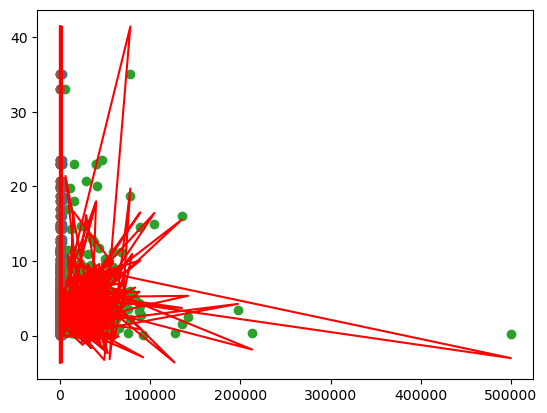

In [56]:
plt.scatter(car_dataset['Year'],car_dataset['Selling_Price'])
plt.scatter(car_dataset['Present_Price'],car_dataset['Selling_Price'])
plt.scatter(car_dataset['Kms_Driven'],car_dataset['Selling_Price'])
plt.scatter(car_dataset['Fuel_Type'],car_dataset['Selling_Price'])
plt.scatter(car_dataset['Transmission'],car_dataset['Selling_Price'])
plt.scatter(car_dataset['Owner'],car_dataset['Selling_Price'])
plt.plot(X_train,lr.predict(X_train),color='red')

## R squared Error

In [29]:
from sklearn.metrics import r2_score
print("MSE",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

MSE 0.9134181721224167


In [36]:
from sklearn.linear_model import Ridge,Lasso

In [37]:
rd = Ridge()
rd.fit(X_train,y_train)
rd.score(X_test,y_test)

0.9136858004772728

In [38]:
rd = Lasso()
rd.fit(X_train,y_train)
rd.score(X_test,y_test)

0.8679568094168661

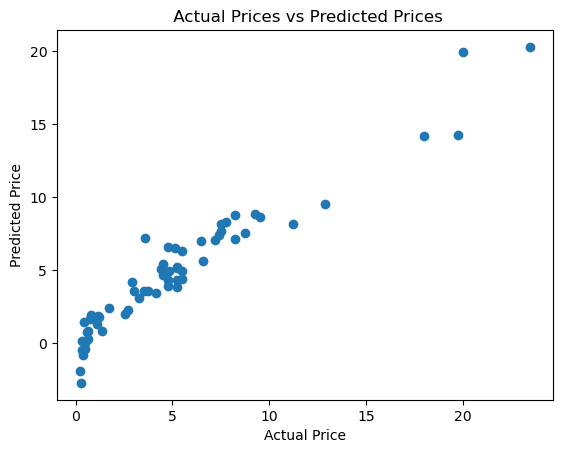

In [52]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()